In [ ]:
print ("Hello world")

Hello world


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

housing = pd.read_csv('/content/drive/MyDrive/datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


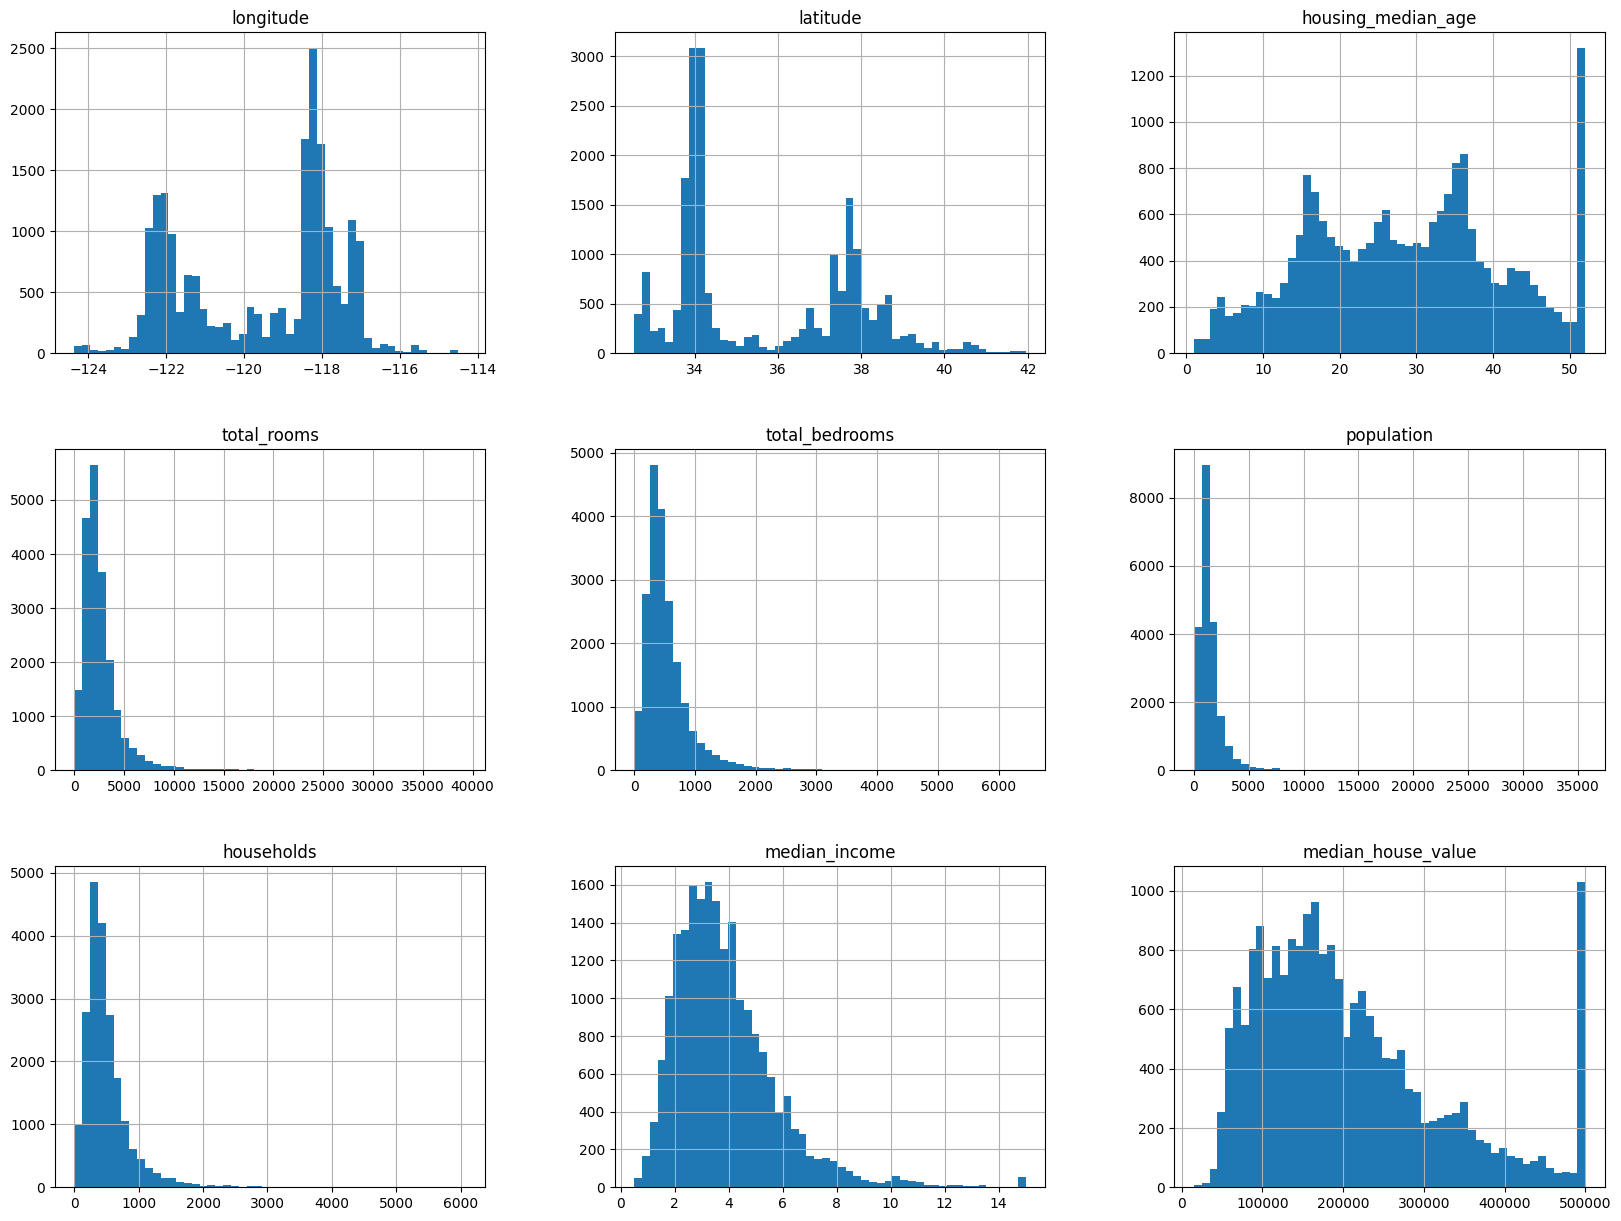

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size= 0.2, random_state =42)

In [8]:
housing['income_cat']=pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels =[1, 2, 3, 4, 5])

<Axes: >

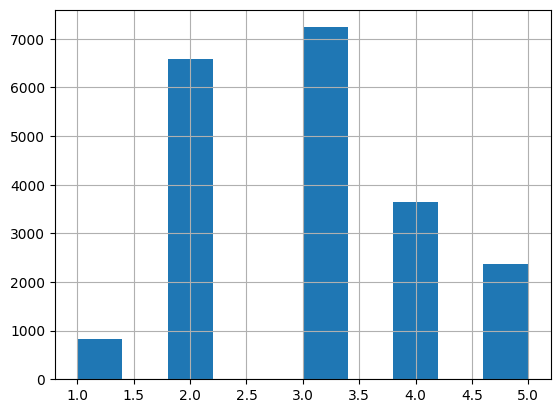

In [9]:
housing['income_cat'].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set["income_cat"].value_counts()/strat_test_set["income_cat"].count()

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [12]:
for set_ in [strat_test_set, strat_train_set]:
  set_.drop("income_cat", axis = 1, inplace = True)

In [13]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

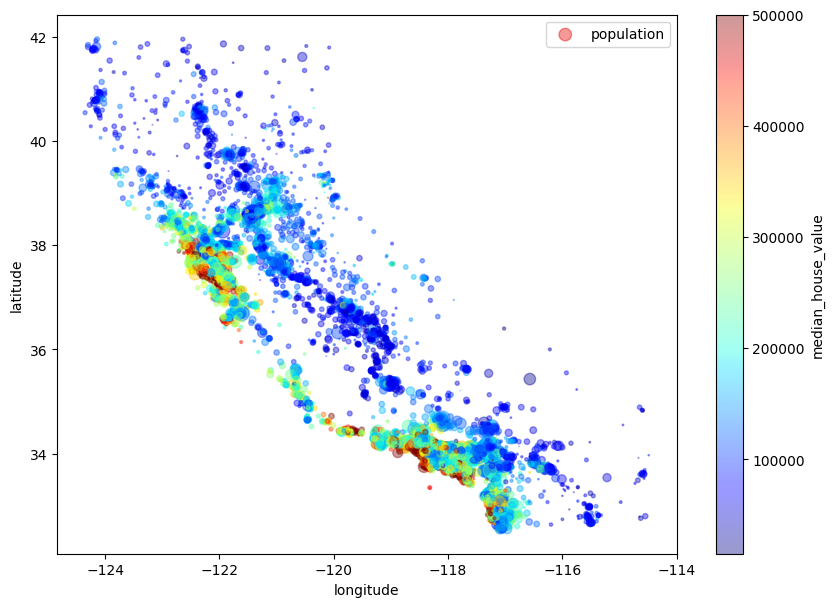

In [15]:
housing.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.4,
             s = housing["population"]/100, label = "population", figsize=(10,7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
             )

In [23]:
df = housing[[col for col in housing.columns if col != 'ocean_proximity']]
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


In [18]:
housing[housing['ocean_proximity'] == "NEAR BAY"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
4396,-122.13,37.41,36.0,4787.0,900.0,2039.0,890.0,5.4063,440900.0,NEAR BAY
11562,-122.40,37.78,32.0,352.0,132.0,313.0,105.0,2.5742,350000.0,NEAR BAY
5239,-122.28,37.87,52.0,1813.0,353.0,828.0,339.0,3.5625,191700.0,NEAR BAY
18110,-122.07,37.39,19.0,1465.0,342.0,646.0,345.0,4.7120,289300.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20204,-122.40,37.76,52.0,4265.0,912.0,1555.0,836.0,4.1190,298300.0,NEAR BAY
1382,-122.06,37.60,17.0,5159.0,832.0,3174.0,817.0,5.8704,234400.0,NEAR BAY
11564,-122.25,37.80,36.0,1678.0,606.0,1645.0,543.0,2.2303,116700.0,NEAR BAY
4094,-122.14,37.84,24.0,2131.0,343.0,874.0,373.0,5.6349,355600.0,NEAR BAY
